Name: Mihir Unmesh Patil


Roll No: TYCOC213

Batch: C/ C-3

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = load_breast_cancer()

X = data.data
y = data.target
features = data.feature_names

print(pd.DataFrame(data.data, columns=data.feature_names).head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nThe feature names are: \n")
for i in features:
    print(i)
print()

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

Selected features using SelectKBest (k=30): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


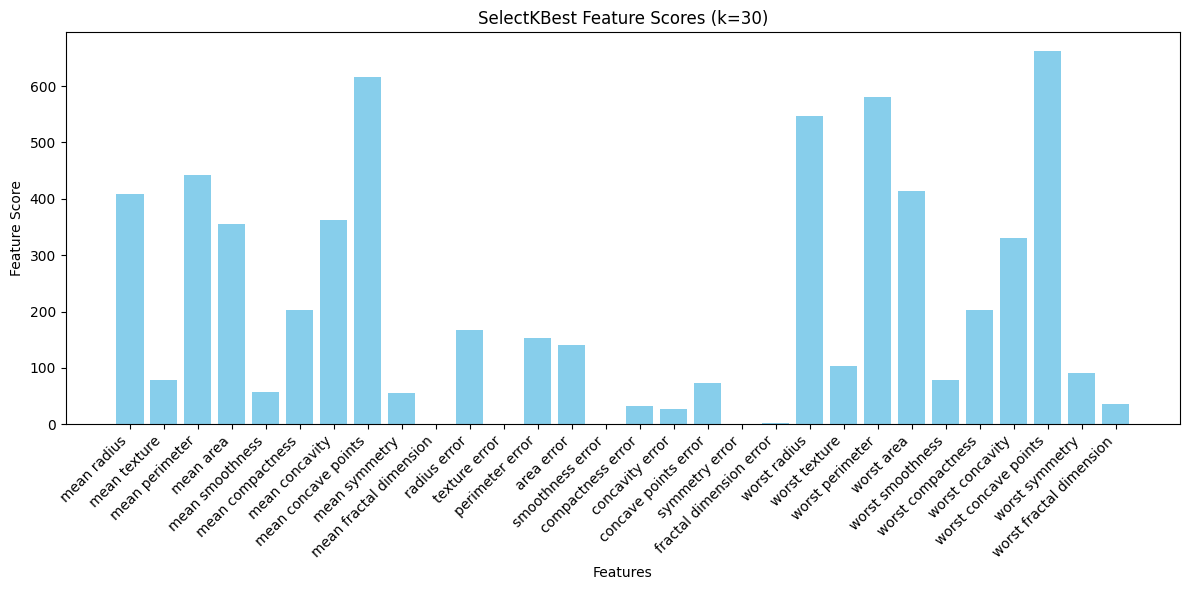

Selected features using SelectKBest (k=25): [ 0  1  2  3  4  5  6  7  8 10 12 13 15 16 17 20 21 22 23 24 25 26 27 28
 29]


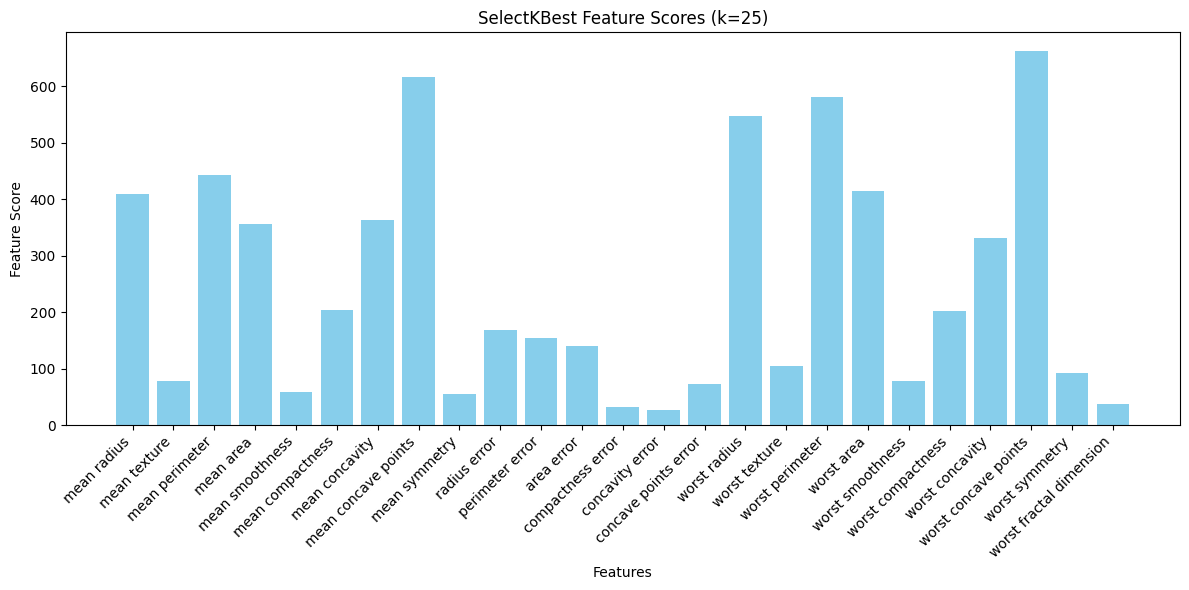

Selected features using SelectKBest (k=10): [ 0  2  3  6  7 20 22 23 26 27]


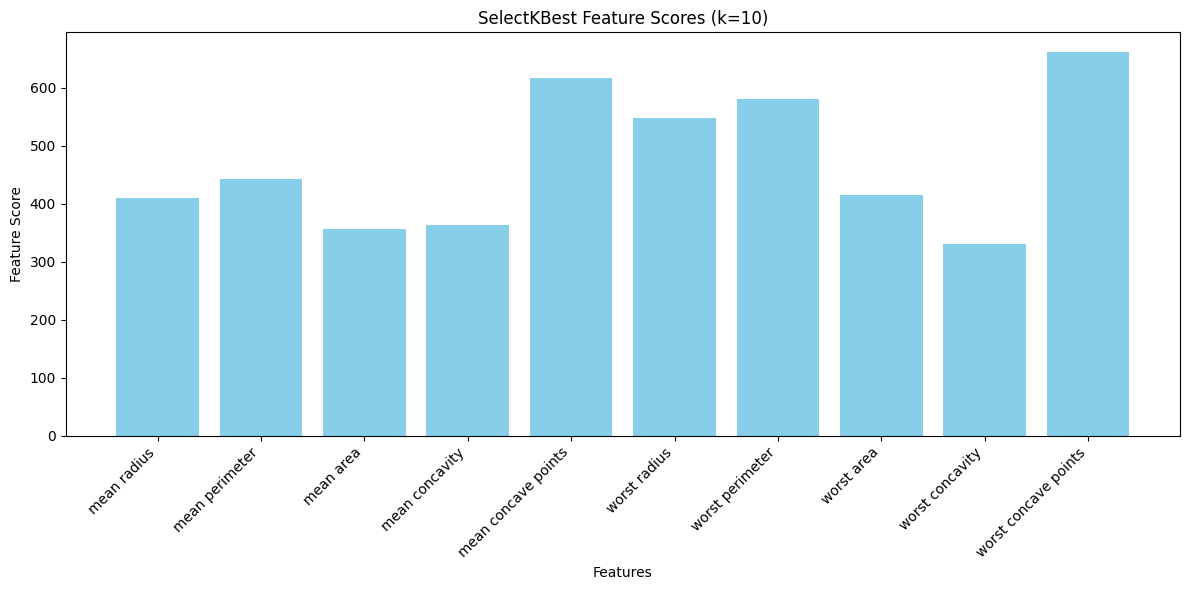

In [4]:
k_values = [30, 25, 10]
kbest_features_all = []

for k in k_values:
    select_k_best = SelectKBest(f_classif, k=k)
    X_train_kbest = select_k_best.fit_transform(X_train, y_train)
    kbest_indices = select_k_best.get_support(indices=True)
    kbest_features = features[kbest_indices]
    kbest_features_all.append(kbest_features)

    print(f"Selected features using SelectKBest (k={k}):", kbest_indices)

    feature_scores = select_k_best.scores_
    kbest_scores = feature_scores[kbest_indices]

    plt.figure(figsize=(12, 6))
    plt.bar(kbest_features, kbest_scores, color='skyblue')
    plt.xlabel("Features")
    plt.ylabel("Feature Score")
    plt.title(f"SelectKBest Feature Scores (k={k})")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Selected features using SelectPercentile (top 25%): [ 0  2  6  7 20 22 23 27]


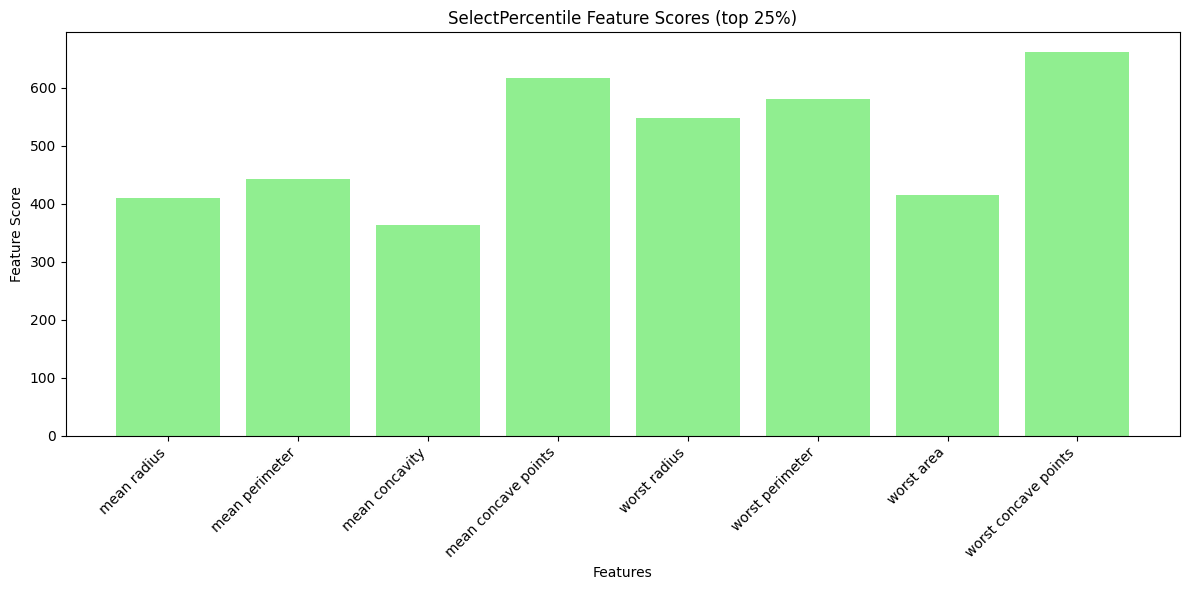


Selected features using SelectPercentile (top 15%): [ 2  7 20 22 27]


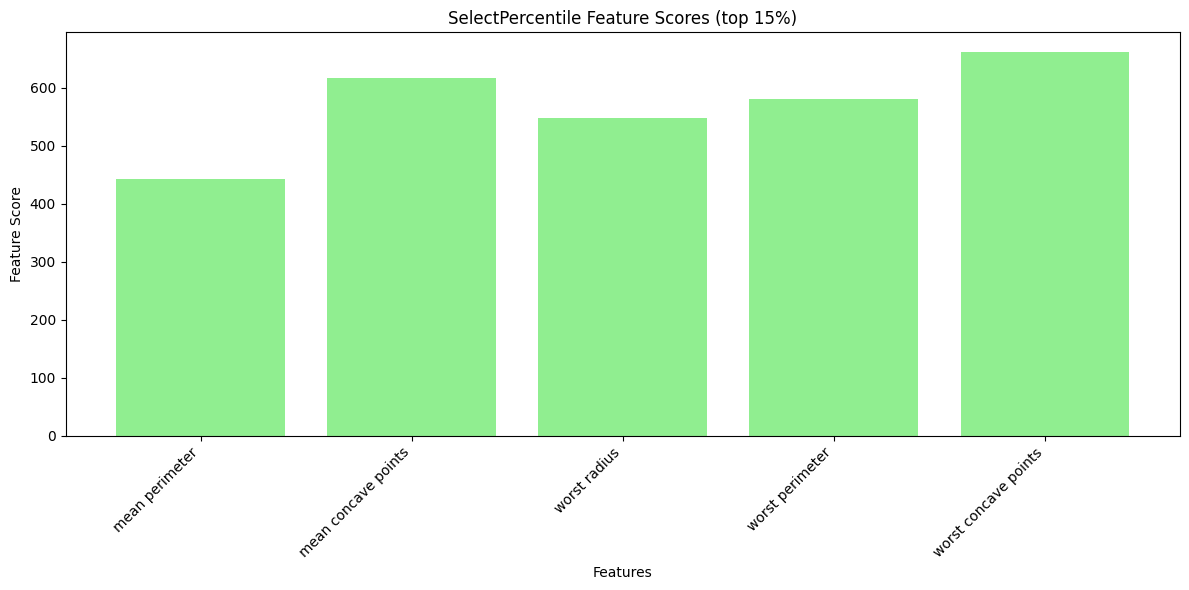


Selected features using SelectPercentile (top 5%): [ 7 27]


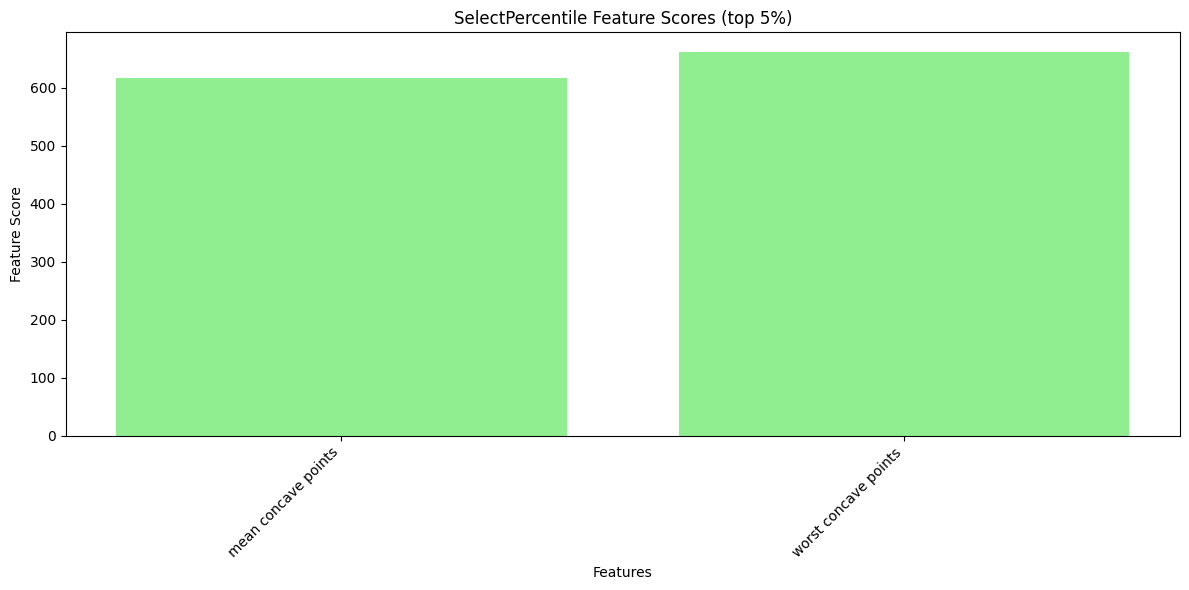

In [5]:
percentiles = [25, 15, 5]
percentile_features_all = []

for percentile in percentiles:
    select_percentile = SelectPercentile(f_classif, percentile=percentile)
    X_train_percentile = select_percentile.fit_transform(X_train, y_train)
    percentile_indices = select_percentile.get_support(indices=True)
    percentile_features = features[percentile_indices]
    percentile_features_all.append(percentile_features)

    print(f"\nSelected features using SelectPercentile (top {percentile}%):", percentile_indices)

    feature_scores = select_percentile.scores_
    percentile_scores = feature_scores[percentile_indices]

    plt.figure(figsize=(12, 6))
    plt.bar(percentile_features, percentile_scores, color='lightgreen')
    plt.xlabel("Features")
    plt.ylabel("Feature Score")
    plt.title(f"SelectPercentile Feature Scores (top {percentile}%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Explained variance ratio by each principal component:
[0.4316748  0.19845652 0.09733159 0.06531574 0.05212151 0.0419896
 0.02263461 0.01682669 0.0129469  0.0120941 ]


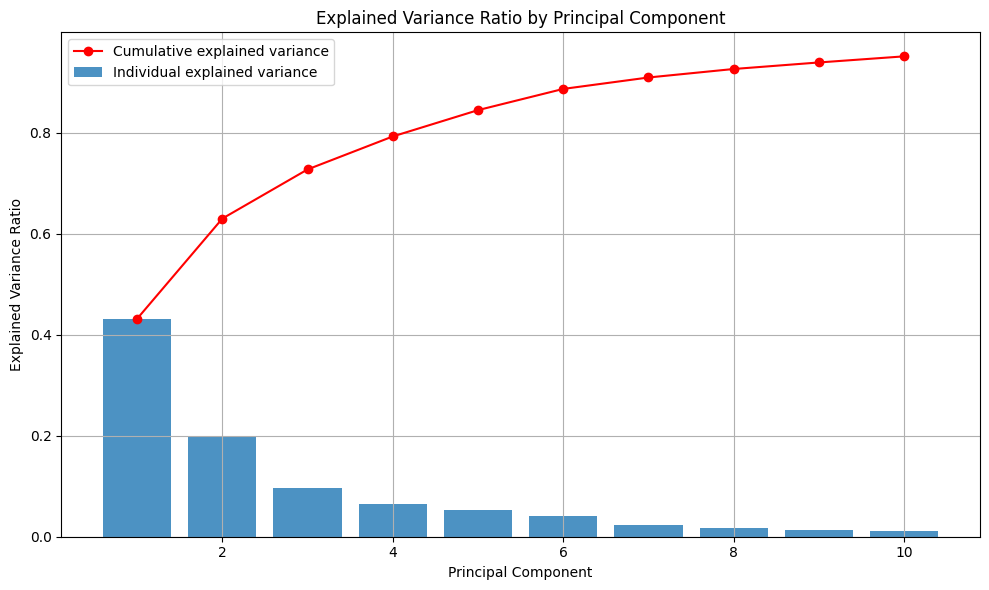


Feature Loadings DataFrame:
                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.781626 -0.580723 -0.016703 -0.057967 -0.058744   
mean texture             0.384967 -0.108653  0.109308  0.848158  0.004710   
mean perimeter           0.814411 -0.537733 -0.017759 -0.060669 -0.058994   
mean area                0.791236 -0.571358  0.044957 -0.082122 -0.015631   
mean smoothness          0.511556  0.439480 -0.216256 -0.181252  0.494682   
mean compactness         0.860189  0.388050 -0.124556 -0.058776 -0.016800   
mean concavity           0.938113  0.145676  0.007813 -0.055790 -0.114766   
mean concave points      0.949970 -0.092773 -0.065102 -0.088716  0.058869   
mean symmetry            0.533505  0.439069 -0.080282 -0.024195  0.334321   
mean fractal dimension   0.211486  0.881212 -0.034640 -0.104849  0.079687   
radius error             0.739204 -0.282704  0.442281 -0.127302  0.230753   
texture error            0.131407  0.242938  0.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)

print("\nExplained variance ratio by each principal component:")
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, c='red', marker='o', linestyle='-', label='Cumulative explained variance')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

feature_names = data.feature_names
num_pc = pca.n_components_

pc_list = [f"PC{i+1}" for i in range(num_pc)]
loadings_df = pd.DataFrame.from_records(loadings, columns=pc_list, index=feature_names)
print("\nFeature Loadings DataFrame:")
print(loadings_df)

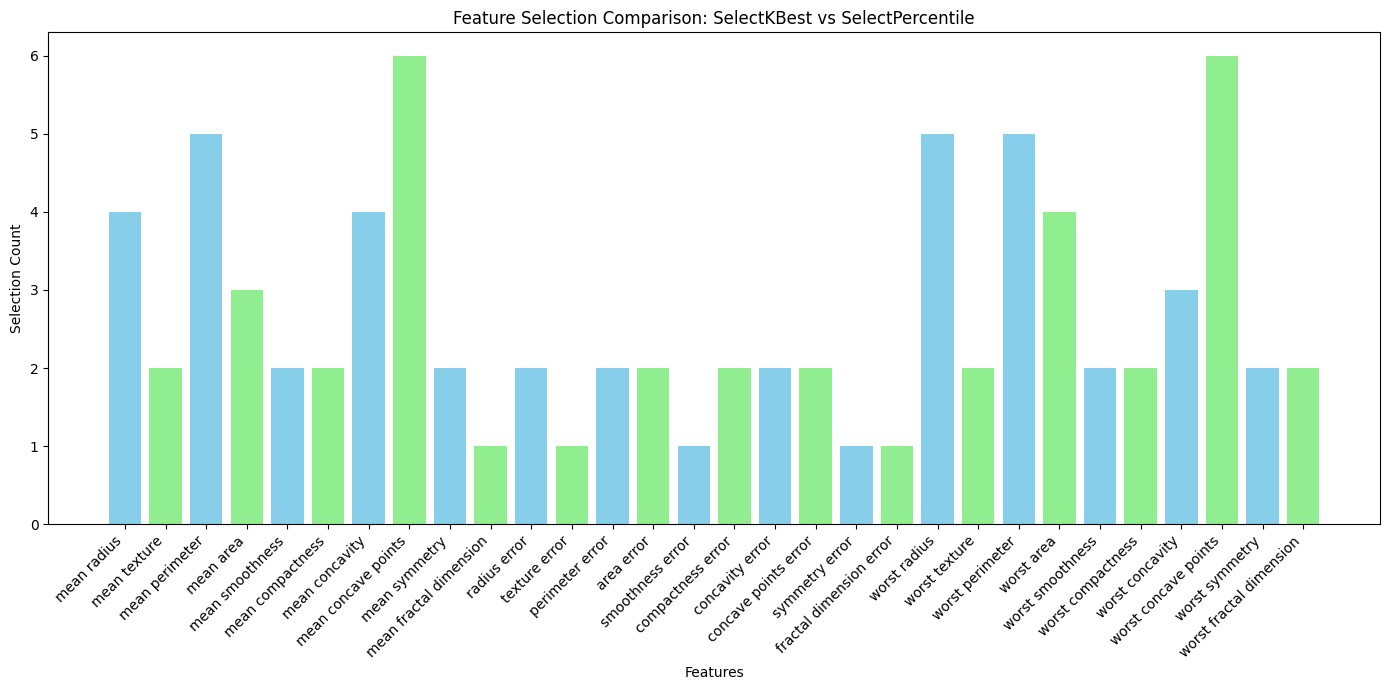

In [7]:
feature_counts = {}

for kbest_features in kbest_features_all:
    for feature in kbest_features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

for percentile_features in percentile_features_all:
    for feature in percentile_features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

feature_names = list(feature_counts.keys())
counts = list(feature_counts.values())

plt.figure(figsize=(14, 7))
plt.bar(feature_names, counts, color=['skyblue', 'lightgreen'])
plt.xlabel("Features")
plt.ylabel("Selection Count")
plt.title("Feature Selection Comparison: SelectKBest vs SelectPercentile")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()